# Simple Neural Networks

A neural network can be understood as a function that approximates another function. For example, using a linear classifier, we could not separate the example below in two classes.

<img src="images/neural_net_points.svg" width="25%"/>

In order to identify both values of $y=1$ (before and after $y=0$), we need a complex function that separates the problem, e.g. a box function.

<img src="images/box_function.svg" width="25%"/>

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = F.sigmoid(self.linear1(x))
        x = F.sigmoid(self.linear2(x))
        return x

We can also use the `nn.Sequential` module to create the neural network as

In [2]:
model = torch.nn.Sequential(torch.nn.Linear(1,2),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(2,1),
                            torch.nn.Sigmoid())

Then, we train the network as we have trained so far.

In [ ]:
model = Net(1, 2, 1)
criterion = nn.BCELoss()
dataset = Data()
train_loader = DataLoader(dataset=dataset, batch_size=1)
optimizer = optim.SGD(model.parameters(), lr=0.01)
train(dataset, model, criterion, train_loader, optimizer, epochs=1000)
yhat = model(x)

# Neural Networks with Multiple Dimensions

Consider we're going to go over the 2-dimensional input example, and everything above extends to 2D dimensions. Just like in 1-dimension, we'll have a 2-dimensional dataset. Looking at the data, we can see we really cannot use a line to separate it, e.g., the XOR problem.
In this case, increasing the number of neurons in a hidden layer satisfies our requisites to correctly classify both classes. Thus, it seems like the more neurons you add, just like in 1-dimension, you can build more complicated functions. Changing the call for our class to solve this problem, we have to change the number of dimensions of the input and the number of hidden units as:

In [4]:
model = Net(2, 4, 1)

# Multi-Class Networks

In order to consider a multi-class classification problem, we have to change the number of neurons in the output of our network. Using the previous example of our network `Net(2, 4, 1)`, we have two dimensions in the input, 4 neurons in the hidden layer and 1 neuron in the output. When considering multi-class classification problem, e.g., classify numbers from 0 to 9, we have 10 classes in the output. Thus, our model should be called as  

In [5]:
model = Net(2, 4, 10)

# Neural Networks for Regression

The creation of a neural network model for regression is similar to the classification, but instead of using the sigmoid function to activate the last linear function, we keep only the linear function. Thus, our class `Net` is changed to

In [6]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = F.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

In case of using the `nn.Sequential` module, we can create a model as:

In [7]:
model = torch.nn.Sequential(torch.nn.Linear(1,2),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(2,1))

Finally, when calling the model, we keep only a single neuron in the output layer as:

In [9]:
model = Net(2, 2, 1)
criterion = nn.MSELoss()

# Activation Functions

### Sigmoid Function

As we saw, the sigmoid activation function keeps values between 0 and 1 and has the following shape.

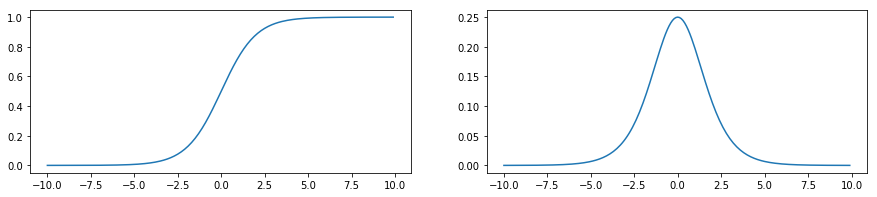

In [4]:
from matplotlib import pyplot as plt
import numpy as np

def sigmoid(X):
    f = 1/(1+np.exp(-X))
    df = f * (1 - f)
    return f, df

X = np.arange(-10, 10, 0.1)
y, dy = sigmoid(X)

plt.figure(figsize=(15,3))
plt.subplot(1, 2, 1)
plt.plot(X, y)
plt.subplot(1, 2, 2)
plt.plot(X, dy)
plt.show()

### Tanh Function

Unlike Sigmoid function, the tanh function keeps values between -1 and 1 (zero centered). The output of the Tanh function is as follows:

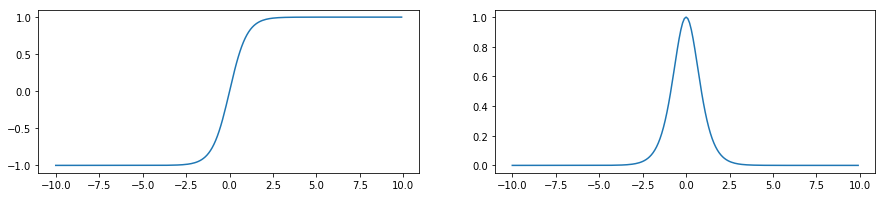

In [6]:
def tanh(X):
    f = np.tanh(X)
    df = 1.0 - f**2
    return f, df

X = np.arange(-10, 10, 0.1)
y, dy = tanh(X)

plt.figure(figsize=(15,3))
plt.subplot(1, 2, 1)
plt.plot(X, y)
plt.subplot(1, 2, 2)
plt.plot(X, dy)
plt.show()

# ReLU Function

Unlike the previous functions, ReLU function equals zero values that are under zero and keep the same input value as output value when they are greater than zero. The ReLU activation function is presented as follows:

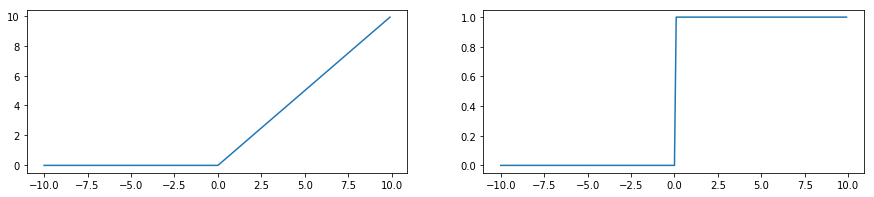

In [11]:
def relu(X):
    f = np.maximum(0, X)
    df = f.copy()
    df[df > 0] = 1.0
    return f, df

X = np.arange(-10, 10, 0.1)
y, dy = relu(X)

plt.figure(figsize=(15,3))
plt.subplot(1, 2, 1)
plt.plot(X, y)
plt.subplot(1, 2, 2)
plt.plot(X, dy)
plt.show()

# Applying other functions to the neural network

In [16]:
# Apply Tanh
class Net_Tanh(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = F.tanh(self.linear1(x))
        x = self.linear2(x)
        return x
    
# Or using nn.Sequential module
model = torch.nn.Sequential(torch.nn.Linear(1,2),
                            torch.nn.Tanh(),
                            torch.nn.Linear(2,1))

In [15]:
# Apply ReLU
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x
    
# Or using nn.Sequential module
model = torch.nn.Sequential(torch.nn.Linear(1,2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2,1))

# Building Deep Networks in Pytorch

Now we will build a neural network with two hidden layers ($H1$ and $H2$). The structure of the network is as illustred below:

<img src="images/neural_network.svg" with="30%" align="center"/>

In [ ]:
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
model = Net(3, 3, 4, 3)

In [ ]:
# Using the nn.Sequential module, we have
model = torch.nn.Sequential(torch.nn.Linear(3,3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3,4)
                            torch.nn.ReLU(),
                            torch.nn.Linear(4,3)
)

# Deeper Neural Networks with ModuleList

Pytorch has a useful feature to build deeper neural networks called nn.ModuleList. Instead of inputting all the layers manually, we create a function that creates a variable number of layers with a variable number of neurons.

In [ ]:
class Net(nn.Module):
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))

    def forward(self, activation):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L-1:
                activation = F.relu(linear_transform(activation))
            else:
                activation = linear_transform(activation)
        return activation

Layers = [2, 3, 4, 3]
model = Net(Layers)
yhat = model(x)